Importation des librairies

In [1]:
import time
import math
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

Création des données d'apprentissage et de test

In [37]:
nbtirage=500

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
Y_app=np.sin(2*math.pi*(X_app*X_app))+np.random.normal(0,0.1,nbtirage)
Y_test=np.sin(2*math.pi*(X_test*X_test))



Tracé des données

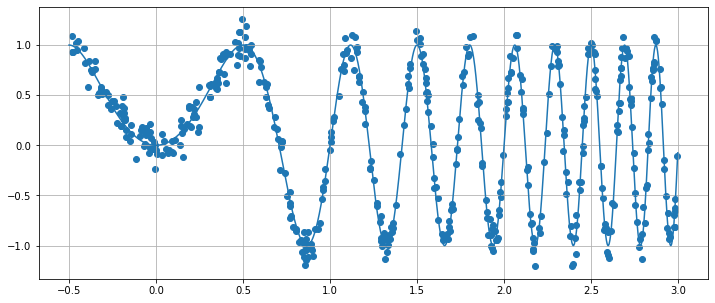

In [38]:
# #############################################################################
plt.figure(figsize=(12,5))
plt.plot(X_test, Y_test)
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()

Apprentissage de la regression

In [40]:
gam=20
epsil=0.03
Csvr=1000

alph=0.01

svr=SVR(kernel='rbf', gamma=gam, C=Csvr, epsilon=epsil)
X_app=np.reshape(X_app, (nbtirage, 1))
svr.fit(X_app, Y_app)
X_test=np.reshape(X_test, (len(X_test), 1))
Y_svr = svr.predict(X_test)

kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
kr.fit(X_app, Y_app)
Y_kr=kr.predict(X_test)

Tracé du résultat

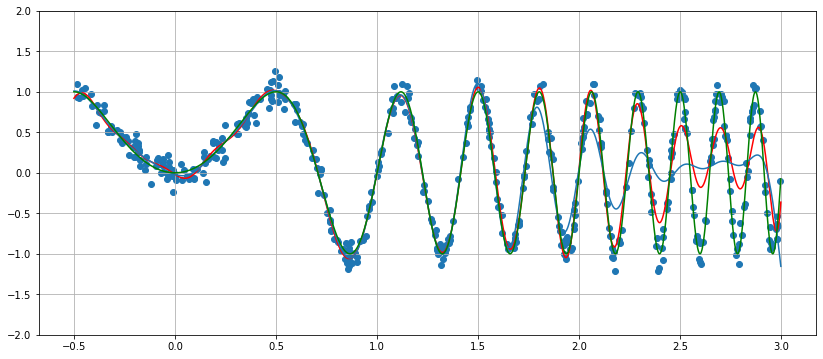

In [41]:
a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
plt.plot(X_test, Y_svr,color='red')
plt.plot(X_test, Y_kr)
plt.plot(X_test, Y_test,color='green')
plt.scatter(X_app, Y_app)
axes.set_ylim([-2,2])
plt.grid()
plt.show()

Evaluation des performances

In [42]:
perf_kr=sum((Y_test-Y_kr)*(Y_test-Y_kr))
perf_svr=sum((Y_test-Y_svr)*(Y_test-Y_svr))
print([perf_kr,perf_svr])

[182.85123149526572, 65.43097078052796]


Recherche des meilleurs paramètres SVR

2.8240917604037095


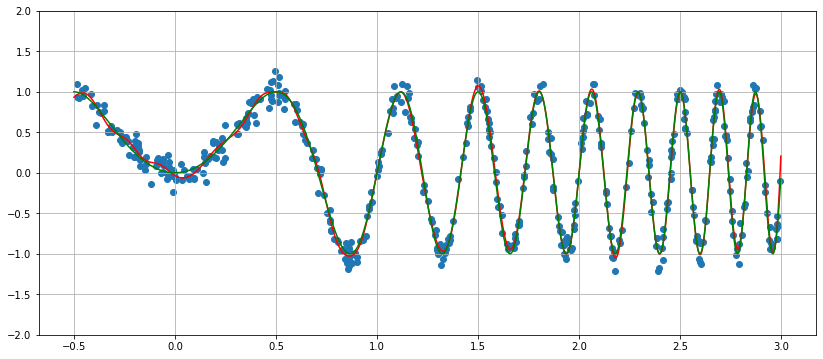

In [43]:
res_svr=np.zeros((100,1))
k=0
Vgam=[0.1,0.5,1,2,5,10,15,20,50,200]
VCsvr=np.logspace(start=-2,stop=4,num=10)
for gam in Vgam:
    k=k+1
    l=0;
    for Csvr in VCsvr:
        l=l+1
        ind=(k-1)*10+l-1
        svr=SVR(kernel='rbf', gamma=gam, C=Csvr, epsilon=epsil)
        svr.fit(X_app, Y_app)
        Y_svr = svr.predict(X_test)
        res_svr[ind,0]=sum((Y_test-Y_svr)*(Y_test-Y_svr))

pmn=np.argmin(res_svr)
nk=pmn//10
nl=pmn-10*nk
gam=Vgam[nk]
Csvr=VCsvr[nl]

svr=SVR(kernel='rbf', gamma=gam, C=Csvr, epsilon=epsil)
svr.fit(X_app, Y_app)
Y_svr = svr.predict(X_test)

print(np.amin(res_svr))

a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
#plt.figure(figsize=(12,5))
plt.plot(X_test, Y_svr,color='red')
plt.plot(X_test, Y_test,color='green')
plt.scatter(X_app, Y_app)
axes.set_ylim([-2,2])
plt.grid()
plt.show()

Recherche des meilleurs paramètres Kernel Ridge

2.8444327424710973


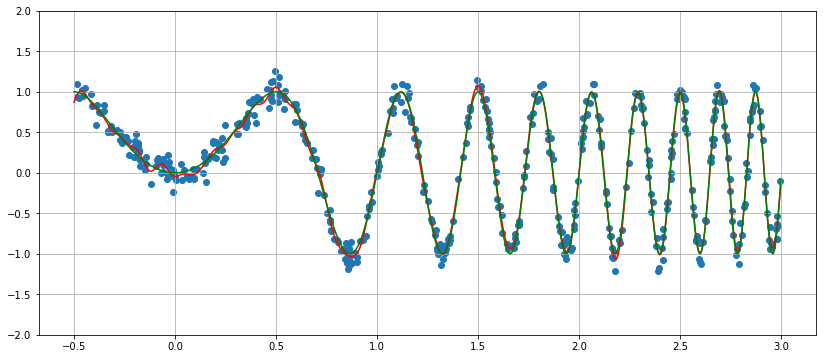

In [44]:
res_kr=np.zeros((100,1))
k=0
Vgam=[0.1,0.5,1,2,5,10,15,20,50,200]
Valph=np.logspace(start=-2,stop=4,num=10)
for gam in Vgam:
    k=k+1
    l=0;
    for alph in Valph:
        l=l+1
        ind=(k-1)*10+l-1
        kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
        kr.fit(X_app, Y_app)
        Y_kr=kr.predict(X_test)
        res_kr[ind,0]=sum((Y_test-Y_kr)*(Y_test-Y_kr))

pmn=np.argmin(res_kr)
nk=pmn//10
nl=pmn-10*nk
gam=Vgam[nk]
alph=Valph[nl]

kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
kr.fit(X_app, Y_app)
Y_kr=kr.predict(X_test)

print(np.amin(res_kr))

a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
#plt.figure(figsize=(12,5))
plt.plot(X_test, Y_kr,color='red')
plt.plot(X_test, Y_test,color='green')
plt.scatter(X_app, Y_app)
axes.set_ylim([-2,2])
plt.grid()
plt.show()